# PROJET D’ÉCONOMÉTRIE APPLIQUÉE

In [1]:
# imprtation des librairies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import chi2
from sklearn.linear_model import LinearRegression



In [2]:
# imprtation du jeux de données
df = pd.read_excel('donnees_immobilieres_extended.xlsx')

In [3]:
# suppression de la collone ID et affiche du dataFrame
df = df.drop(columns=["ID"])
columns_var = df.columns
df

,Surface_m2,Chambres,Annee_construction,Distance_centre_km,Etage,Ascenseur,Annee_vente,Qualite_ecole,Revenu_median_quartier,Distance_universite,Prix_milliers_euros
0,139.87,3,1982,21.33,2,1,2023,1.1,47.5,11.9,1961.68
1,114.47,4,1991,2.90,5,1,2022,4.7,44.2,11.9,2303.67
2,145.91,2,2005,3.00,3,1,2017,3.2,53.8,10.7,2224.12
3,180.92,4,1995,29.61,3,1,2022,6.1,68.3,11.1,2425.63
4,110.63,3,2016,11.54,0,0,2021,9.0,81.9,10.8,2323.34
...,...,...,...,...,...,...,...,...,...,...,...
145,151.27,3,1992,10.20,1,0,2019,4.6,51.3,6.7,2140.32
146,70.52,2,2019,19.19,2,0,2016,4.1,42.9,3.7,1680.16
147,67.18,1,2021,7.58,4,0,2019,5.4,71.6,8.7,1902.30
148,140.88,3,1988,2.74,3,0,2020,5.0,54.4,9.5,2252.99


In [4]:
# infos utiles
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Surface_m2              150 non-null    float64
 1   Chambres                150 non-null    int64  
 2   Annee_construction      150 non-null    int64  
 3   Distance_centre_km      150 non-null    float64
 4   Etage                   150 non-null    int64  
 5   Ascenseur               150 non-null    int64  
 6   Annee_vente             150 non-null    int64  
 7   Qualite_ecole           150 non-null    float64
 8   Revenu_median_quartier  150 non-null    float64
 9   Distance_universite     150 non-null    float64
 10  Prix_milliers_euros     150 non-null    float64
dtypes: float64(6), int64(5)
memory usage: 13.0 KB


In [5]:
# Les statistics desciptives
stats_base = df.describe()
stats_base.drop('count')
print(stats_base)

       Surface_m2    Chambres  Annee_construction  Distance_centre_km  \
count  150.000000  150.000000          150.000000          150.000000   
mean   116.706800    2.886667         2001.826667           16.500267   
std     37.693819    1.077760           11.704841            9.017430   
min     15.210000    1.000000         1980.000000            0.830000   
25%     93.240000    2.000000         1991.000000            9.105000   
50%    117.845000    3.000000         2002.500000           16.865000   
75%    139.637500    4.000000         2012.000000           24.697500   
max    218.530000    5.000000         2022.000000           29.990000   

            Etage   Ascenseur  Annee_vente  Qualite_ecole  \
count  150.000000  150.000000   150.000000     150.000000   
mean     2.580000    0.460000  2019.840000       5.468667   
std      1.761901    0.500067     2.288225       1.868249   
min      0.000000    0.000000  2015.000000       1.000000   
25%      1.000000    0.000000  2018.0

In [6]:
# aves l'asymétrie et l'applatissement du prix
skew_prix = df["Prix_milliers_euros"].skew()
kurt_prix = df["Prix_milliers_euros"].kurt()

print(f'\nAsymétrie (skewness) du prix :{skew_prix:.3f}')
print(f'Aplatissement (kurtosis) du prix :{kurt_prix:.3f}')




Asymétrie (skewness) du prix :0.156
Aplatissement (kurtosis) du prix :-0.469


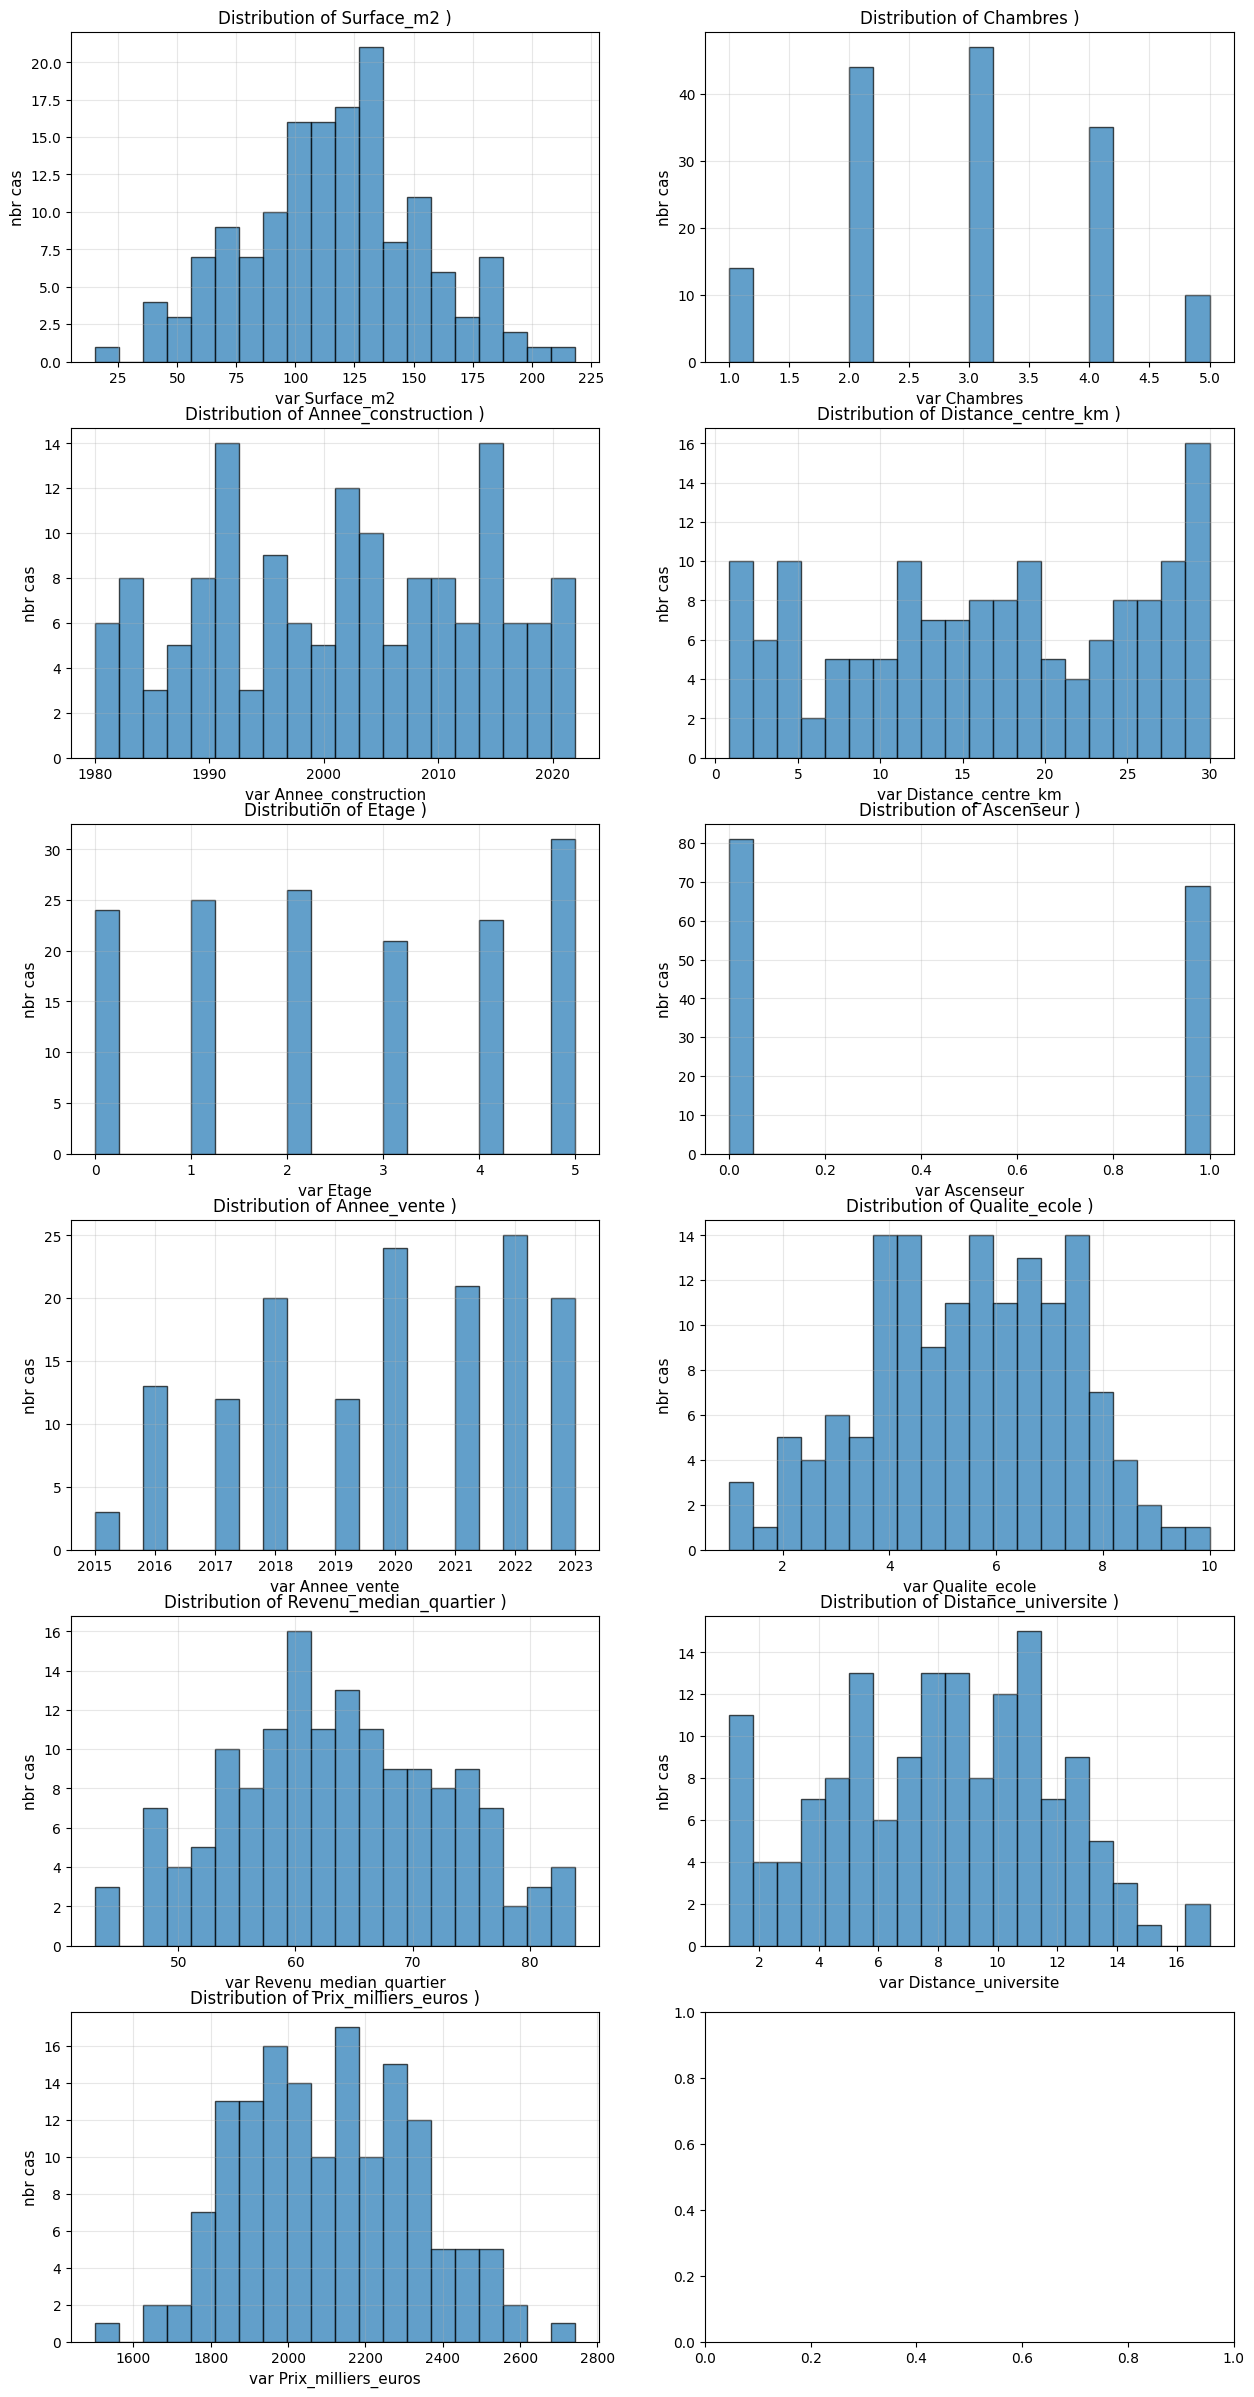

In [7]:
# création des histogrammes
fig_line = 6
fig_col = 2
fig, axes = plt.subplots(fig_line, fig_col, figsize=(15, 30))
k=0

for i in range(fig_line):
    for j in range(fig_col):
        if k < 11 :
            var = columns_var[k]
            axes[i, j].hist(df[var], bins=20, edgecolor='black', alpha=0.7)
            axes[i, j].set_xlabel(f'var {var}', fontsize=11)
            axes[i, j].set_ylabel('nbr cas', fontsize=11)
            axes[i, j].set_title(f'Distribution of {var} )', fontsize=12)
            axes[i, j].grid(True, alpha=0.3)
            k += 1


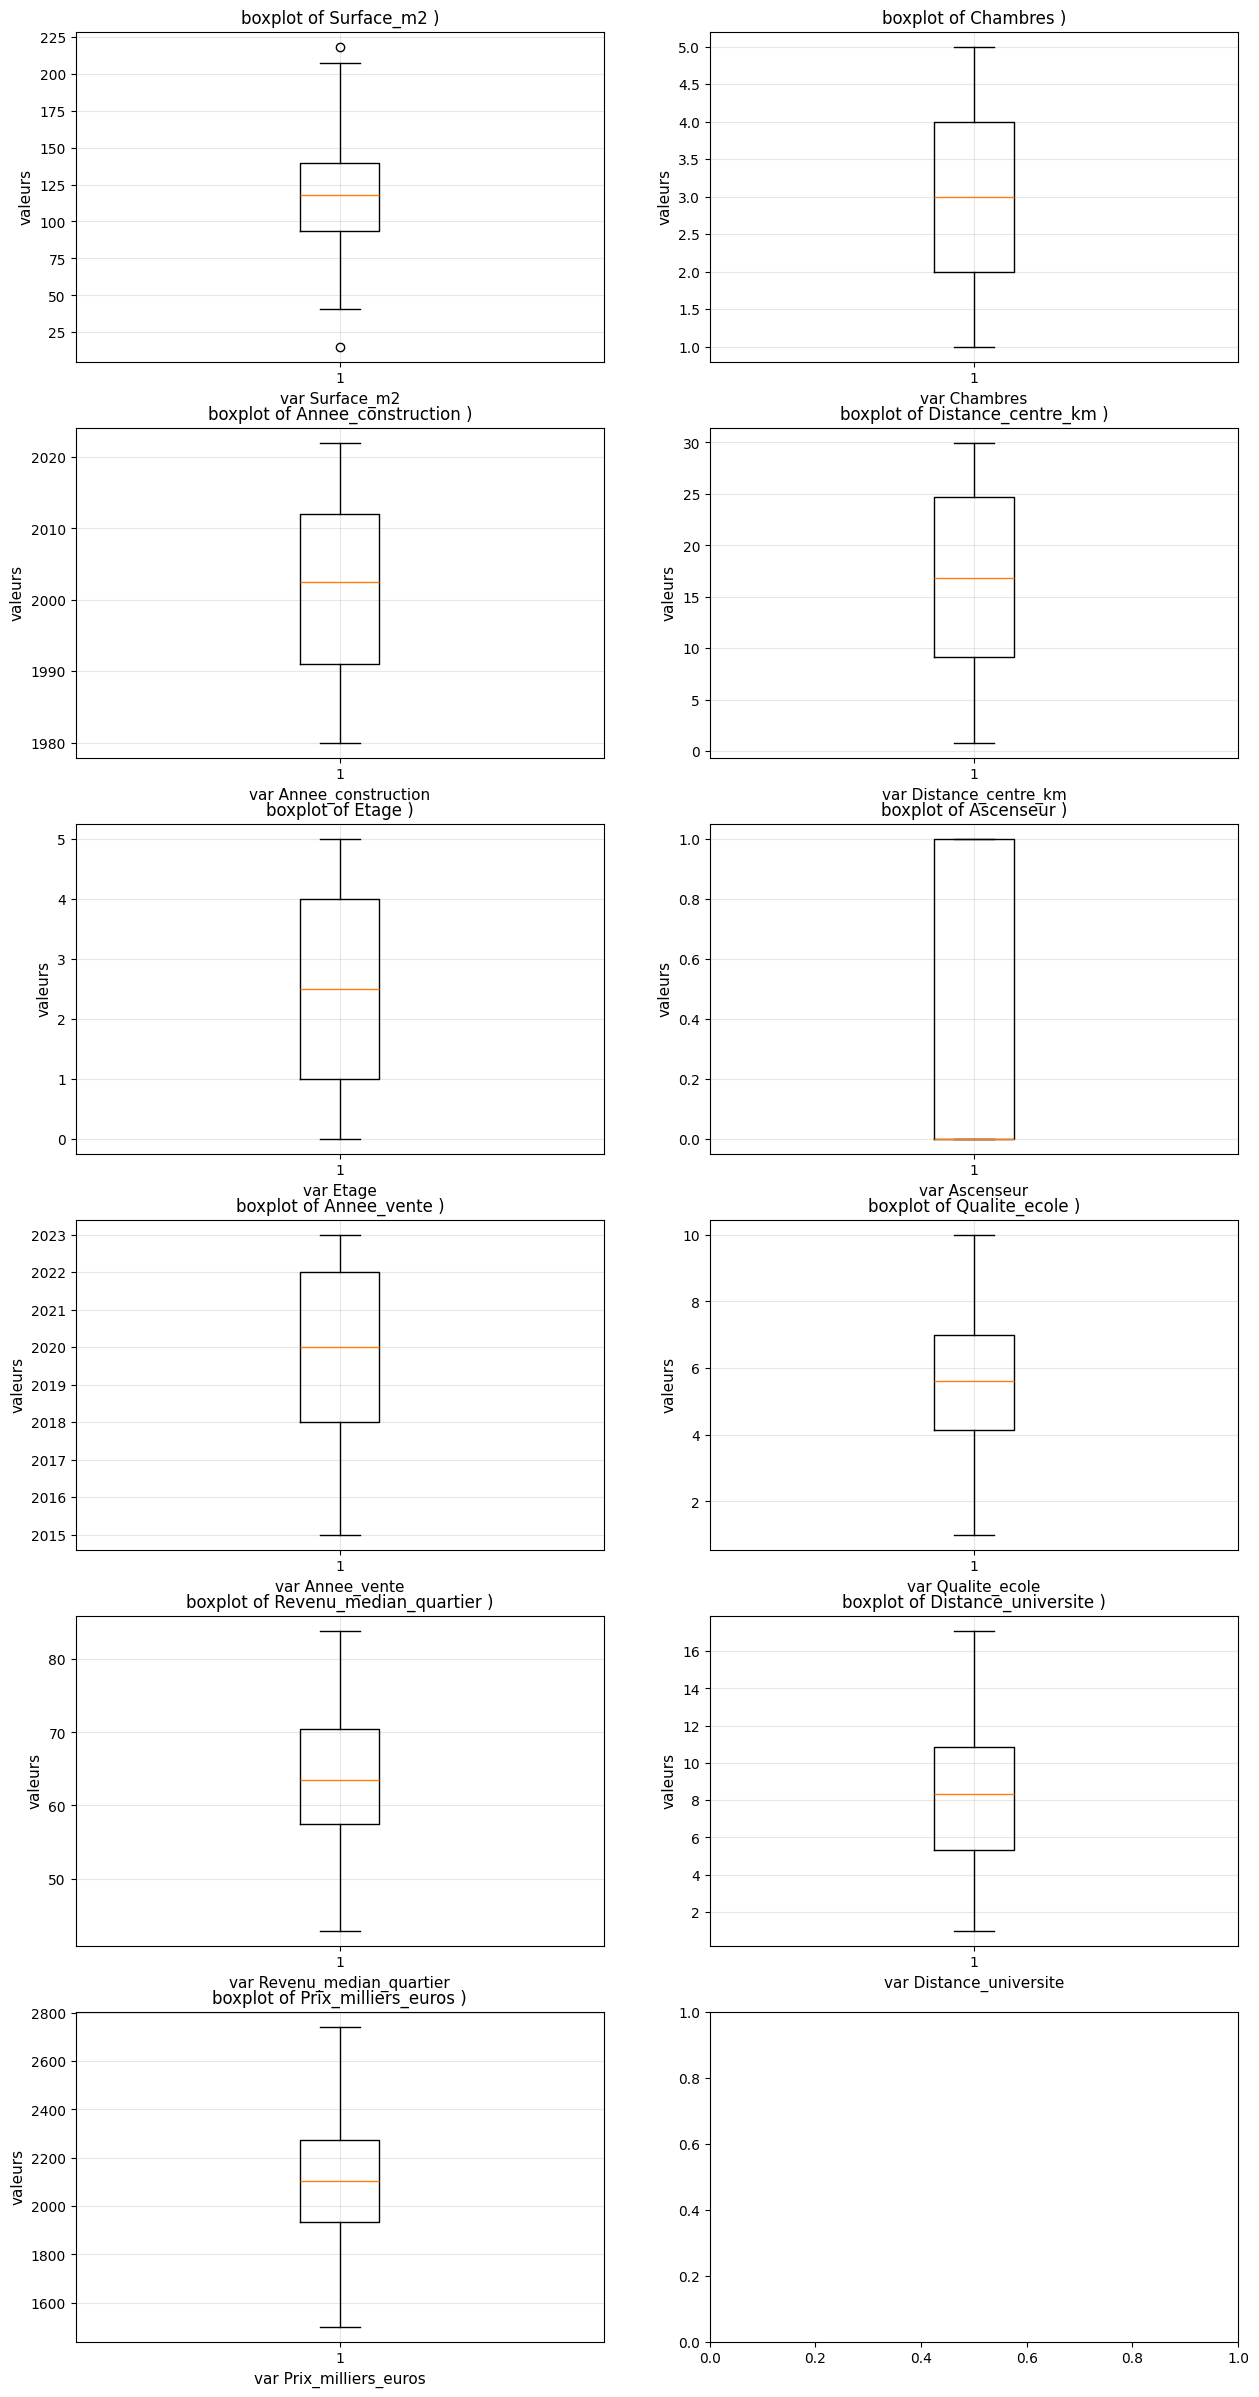

In [8]:
# création des boites à moustache
fig, axes = plt.subplots(fig_line, fig_col, figsize=(15, 30))
k=0

for i in range(fig_line):
    for j in range(fig_col):
        if k < 11 :
            var = columns_var[k]
            axes[i, j].boxplot(df[var])
            axes[i, j].set_xlabel(f'var {var}', fontsize=11)
            axes[i, j].set_ylabel('valeurs', fontsize=11)
            axes[i, j].set_title(f'boxplot of {var} )', fontsize=12)
            axes[i, j].grid(True, alpha=0.3)
            k += 1

### Corrélations

In [9]:
# corrélations de Person
corr = df.corr()
print(corr)

                        Surface_m2  Chambres  Annee_construction  \
Surface_m2                1.000000  0.590959           -0.034333   
Chambres                  0.590959  1.000000            0.039398   
Annee_construction       -0.034333  0.039398            1.000000   
Distance_centre_km       -0.074765 -0.102319           -0.088117   
Etage                     0.061126  0.048986           -0.044559   
Ascenseur                -0.062416 -0.014694           -0.100949   
Annee_vente               0.060417  0.036140           -0.055920   
Qualite_ecole             0.043832 -0.012775           -0.009887   
Revenu_median_quartier    0.013908  0.011761            0.030304   
Distance_universite      -0.088362 -0.089609           -0.006250   
Prix_milliers_euros       0.826731  0.614825            0.068358   

                        Distance_centre_km     Etage  Ascenseur  Annee_vente  \
Surface_m2                       -0.074765  0.061126  -0.062416     0.060417   
Chambres               

In [10]:
len(corr.columns)

11

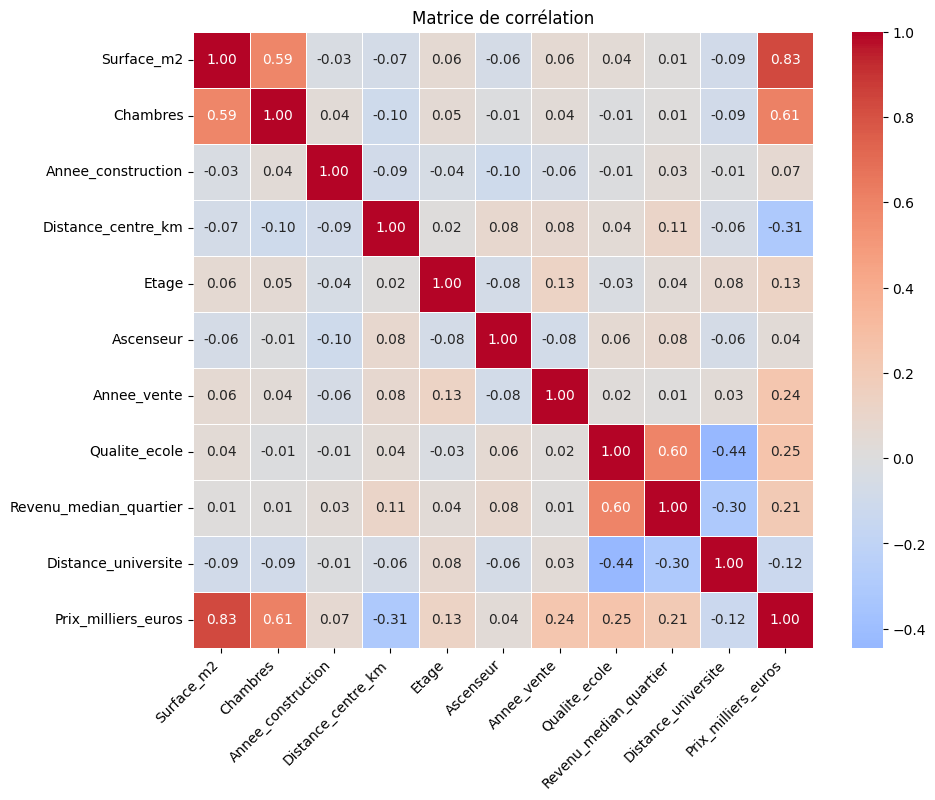

In [11]:

# graphique de corrélation avec des couleurs (avec seaborn vu en Data M)
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)
plt.xticks(rotation=45, ha="right")
plt.title("Matrice de corrélation")
plt.show()

 ### Le Modèle Linéaire

In [12]:
#### Obtention des coefficients avec la méthode des moindres carrés (MCO) ###

N = 150
x = df['Surface_m2']
y = df['Prix_milliers_euros']

# moyennes
x_bar = np.mean(x)
y_bar = np.mean(y)

# coefficient directeur estimé
numerator = np.sum((x - x_bar) * (y - y_bar))
denominator = np.sum((x - x_bar)**2)
b1_hat = numerator / denominator

# valeur x=0 origine estimé
b0_hat = y_bar - b1_hat * x_bar

# y estimé
y_hat = b0_hat + b1_hat * x

# calcul des erreurs
u_hat = y - y_hat


# calcul de R² avec les 2 méhodes
SST = np.sum((y - y_bar)**2)
SSR = np.sum((y_hat - y_bar)**2)
SSE = np.sum(u_hat**2)

R2_method1 = SSR / SST
R2_method2 = 1 - SSE / SST

print("calcul des coefficients MCO :")
print(f"b0_hat = {b0_hat:.4f}")
print(f"b1_hat = {b1_hat:.4f}")
print(f"\nMoyenn des erreurs: {np.mean(u_hat):.14f} (should be ≈ 0)")

print("\nAnalyse de la variance R²:")
print(f"SST (Total de la somme des carrés): {SST:.4f}")
print(f"SSR (Total de la somme des carrés estimé): {SSR:.4f}")
print(f"SSE (Somme des erreur au carré): {SSE:.4f}")
print(f"\nVerification: SST = SSR + SSE?")
print(f"{SST:.4f} = {SSR:.4f} + {SSE:.4f} = {SSR + SSE:.4f}")
print(f"\nR² (Methode 1: SSR/SST): {R2_method1:.4f}")
print(f"R² (Methode 2: 1 - SSE/SST): {R2_method2:.4f}")
print(f"\nInterpretation: {R2_method1*100:.2f}% de la variance dans y est expliquée par x")


calcul des coefficients MCO :
b0_hat = 1519.3743
b1_hat = 5.0428

Moyenn des erreurs: 0.00000000000004 (should be ≈ 0)

Analyse de la variance R²:
SST (Total de la somme des carrés): 7876687.1845
SSR (Total de la somme des carrés estimé): 5383592.2807
SSE (Somme des erreur au carré): 2493094.9039

Verification: SST = SSR + SSE?
7876687.1845 = 5383592.2807 + 2493094.9039 = 7876687.1845

R² (Methode 1: SSR/SST): 0.6835
R² (Methode 2: 1 - SSE/SST): 0.6835

Interpretation: 68.35% de la variance dans y est expliquée par x


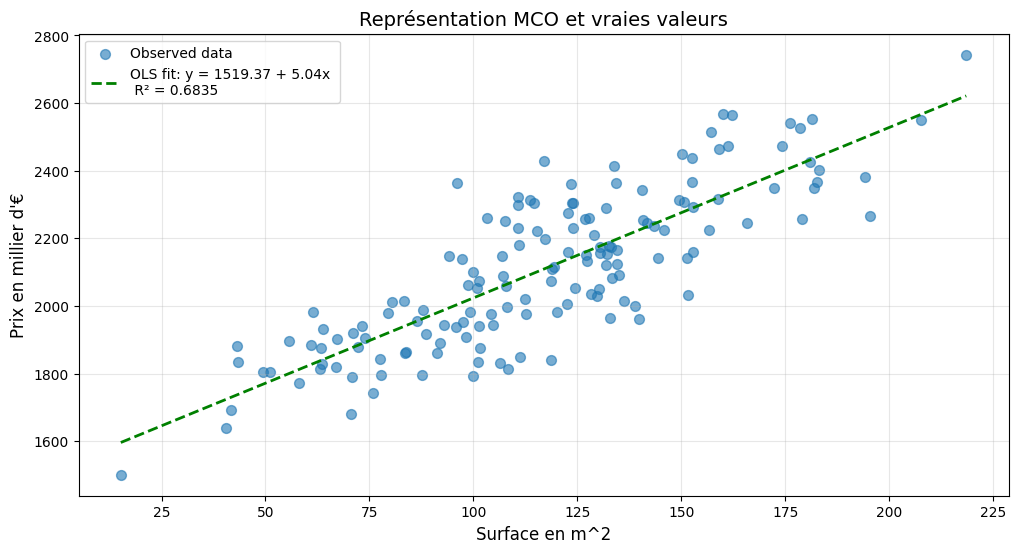

In [13]:
# représentation de la distribution, l'équation de la droite et R² + R² ajusté

plt.figure(figsize=(12, 6))

sort_idx = np.argsort(x)
x_sorted = x[sort_idx]
y_hat_sorted = y_hat[sort_idx]

plt.scatter(x, y, alpha=0.6, label='Observed data', s=50)
plt.plot(x_sorted, y_hat_sorted, 'g--', 
         label=f'OLS fit: y = {b0_hat:.2f} + {b1_hat:.2f}x \n R² = {R2_method1:.4f}', linewidth=2)



plt.xlabel('Surface en m^2', fontsize=12)
plt.ylabel('Prix en millier d\'€', fontsize=12)
plt.title('Représentation MCO et vraies valeurs', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [14]:

# L’écart-type de chaque coefficient (ˆσˆβj)
# La statistique t et la p-valeur

sigma_squared_hat = np.sum(u_hat**2) / (N - 2)
var_b1_hat = sigma_squared_hat / np.sum((x - x_bar)**2)
var_b0_hat = (sigma_squared_hat / N) + (x_bar**2 * var_b1_hat)
se_b1_hat = np.sqrt(var_b1_hat)
se_b0_hat = np.sqrt(var_b0_hat)

# t statistique
t_stat_b0 = b0_hat / se_b0_hat
t_stat_b1 = b1_hat / se_b1_hat

# p-values
p_value_b0 = 2 * (1 - stats.t.cdf(abs(t_stat_b0), N - 2))
p_value_b1 = 2 * (1 - stats.t.cdf(abs(t_stat_b1), N - 2))

print("Variance et estimateurs pour les coefficients beta:\n")
print(f"Estimation du sigma écart type σ²: {sigma_squared_hat:.4f}")
print(f"\n Paramètres estimés :")
print(f"b0_hat = {b0_hat:.4f}, SE = {se_b0_hat:.4f}, t = {t_stat_b0:.4f}, p-value = {p_value_b0:.4f}")
print(f"b1_hat = {b1_hat:.4f}, SE = {se_b1_hat:.4f}, t = {t_stat_b1:.4f}, p-value = {p_value_b1:.4f}")

# Interval de certitude à 95%
t_critical = stats.t.ppf(0.975, N - 2)
ci_b0 = (b0_hat - t_critical * se_b0_hat, b0_hat + t_critical * se_b0_hat)
ci_b1 = (b1_hat - t_critical * se_b1_hat, b1_hat + t_critical * se_b1_hat)

print(f"\nInyervale de certitude à 95%:")
print(f"b0: [{ci_b0[0]:.4f}, {ci_b0[1]:.4f}]")
print(f"b1: [{ci_b1[0]:.4f}, {ci_b1[1]:.4f}]")

Variance et estimateurs pour les coefficients beta:

Estimation du sigma écart type σ²: 16845.2358

 Paramètres estimés :
b0_hat = 1519.3743, SE = 34.5845, t = 43.9323, p-value = 0.0000
b1_hat = 5.0428, SE = 0.2821, t = 17.8771, p-value = 0.0000

Inyervale de certitude à 95%:
b0: [1451.0311, 1587.7175]
b1: [4.4854, 5.6002]


## Régression Multiple paramètres 

In [15]:
# Forme matricielle
X = np.column_stack((
    np.ones(N),         
    df["Surface_m2"],
    df["Chambres"],
    df["Annee_construction"],
    df["Distance_centre_km"],
    df["Etage"],
    df["Ascenseur"]
))
# Y matriciel
Y = df["Prix_milliers_euros"].to_numpy()
Y = np.asarray(Y).reshape(-1)   # garantit shape (n,)

# matrice beta estimé
XtX_inv = np.linalg.inv(X.T @ X)
B_hat = XtX_inv @ X.T @ Y

print("Résultats de la régression linéaire multiple:\n")
print("Valeurs des coefficients:\n")
print(f"b0_constant = {B_hat[0]:.4f}")
print(f"b1_Surface_m2 = {B_hat[1]:.4f}")
print(f"b2_Chambres = {B_hat[2]:.4f}")
print(f"b3_Annee_construction = {B_hat[3]:.4f}")
print(f"b4_Distance_centre_km = {B_hat[4]:.4f}")
print(f"b5_Etage = {B_hat[5]:.4f}")
print(f"b6_Ascenseur = {B_hat[6]:.4f}")

# Calcul matriciel des erreurs
Y_hat = X @ B_hat
U_hat = Y - Y_hat

# Calcul matriciel de R²
SST_multi = np.sum((Y - np.mean(Y))**2)
SSE_multi = np.sum(U_hat**2)
R2_multi = 1 - SSE_multi / SST_multi

# Calcul matriciel de R² ajusté
k = X.shape[1]
R2_adj_multi = 1 - (N - 1) / (N - k) * (1 - R2_multi)

print(f"\nR² = {R2_multi:.4f}")
print(f"R² ajusté = {R2_adj_multi:.4f}")

Résultats de la régression linéaire multiple:

Valeurs des coefficients:

b0_constant = -1679.4908
b1_Surface_m2 = 4.3879
b2_Chambres = 33.9205
b3_Annee_construction = 1.6093
b4_Distance_centre_km = -6.1446
b5_Etage = 12.2540
b6_Ascenseur = 55.5141

R² = 0.7887
R² ajusté = 0.7798


In [16]:
model_multi = sm.OLS(Y, X).fit()
print("Statsmodels OLS Summary:")
print(model_multi.summary())

# Compare estimates
print("\n" + "="*60)
print("Comparison of estimates:")
print("="*60)
print(f"{'Parameter':<12} {'Manual':<12} {'Statsmodels':<12} {'Difference':<12}")
print("-"*60)
for i in range(len(B_hat)):
    diff = abs(B_hat[i] - model_multi.params[i])
    print(f"b{i:<11} {B_hat[i]:<12.6f} {model_multi.params[i]:<12.6f} {diff:<12.8f}")

Statsmodels OLS Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     88.94
Date:                Tue, 30 Dec 2025   Prob (F-statistic):           9.10e-46
Time:                        23:03:33   Log-Likelihood:                -911.43
No. Observations:                 150   AIC:                             1837.
Df Residuals:                     143   BIC:                             1858.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1679.4908   153

### Transformation logarithmique

In [17]:
# Transformer les matrices en log
models = {}
#Y_log
Y_log = np.log(Y)
#X_log
X_linlog = X.copy()
# log(Surface)
X_linlog[:, 1] = np.log(X_linlog[:, 1])
# log(Distance)
X_linlog[:, 4] = np.log(X_linlog[:, 4])

models["linear-linear"] = sm.OLS(Y, X).fit()
models["log-linear"] = sm.OLS(Y_log, X).fit()
models["linear-log"] = sm.OLS(Y, X_linlog).fit()
models["log-log"] = sm.OLS(Y_log, X_linlog).fit()

print("Model Comparison:\n")
for name, model in models.items():
    print(f"{name:15} R² = {model.rsquared:.4f}")
    print(f"                Coefficients: b0 = {model.params[0]:.4f}, b1 = {model.params[1]:.4f}")
    print()

Model Comparison:

linear-linear   R² = 0.7887
                Coefficients: b0 = -1679.4908, b1 = 4.3879

log-linear      R² = 0.7916
                Coefficients: b0 = 5.8413, b1 = 0.0021

linear-log      R² = 0.7365
                Coefficients: b0 = -1955.3942, b1 = 382.3162

log-log         R² = 0.7546
                Coefficients: b0 = 5.6693, b1 = 0.1898



## Calcul des VIFs

In [18]:
var_names = ["Constante", "Surface_m2", "Chambres", "Annee_construction",
             "Distance_centre_km", "Etage", "Ascenseur"]

# Fonction R² : régression de x_j sur X_{-j}
def r2_auxiliary(x_j, X_others):
    # Estimation OLS via least squares
    beta_j, *_ = np.linalg.lstsq(X_others, x_j, rcond=None)
    x_hat = X_others @ beta_j
    sse = np.sum((x_j - x_hat)**2)
    sst = np.sum((x_j - np.mean(x_j))**2)
    return 1 - sse / sst

# Calcul des VIF
vif = {}

# On saute la constante 
for j in range(1, X.shape[1]):
    x_j = X[:, j]
    
    # X_others = toutes les colonnes sauf j
    X_others = np.delete(X, j, axis=1)
    
    R2_j = r2_auxiliary(x_j, X_others)
    vif_j = 1 / (1 - R2_j)
    
    vif[var_names[j]] = {"R2_aux": R2_j, "VIF": vif_j}


print("VIF (Variance Inflation Factor) :\n")
for name, vals in vif.items():
    print(f"{name:20s}  R²_aux = {vals['R2_aux']:.4f}   VIF = {vals['VIF']:.3f}")

VIF (Variance Inflation Factor) :

Surface_m2            R²_aux = 0.3570   VIF = 1.555
Chambres              R²_aux = 0.3570   VIF = 1.555
Annee_construction    R²_aux = 0.0262   VIF = 1.027
Distance_centre_km    R²_aux = 0.0238   VIF = 1.024
Etage                 R²_aux = 0.0127   VIF = 1.013
Ascenseur             R²_aux = 0.0271   VIF = 1.028


## F-test

F-Test avec l'ajout des 2 variables Qualite_ecole et Revenu_median_quartier

In [19]:
# Forme matricielle
X = np.column_stack((X, df["Revenu_median_quartier"], df['Qualite_ecole']))


# matrice beta estimé
B_hat = np.linalg.inv(X.T @ X) @ X.T @ Y


print("Résultats de la régression linéaire multiple:\n")
print("Valeurs des coefficients:\n")
print(f"b0_constant = {B_hat[0]:.4f}")
print(f"b1_Surface_m2 = {B_hat[1]:.4f}")
print(f"b2_Chambres = {B_hat[2]:.4f}")
print(f"b3_Annee_construction = {B_hat[3]:.4f}")
print(f"b4_Distance_centre_km = {B_hat[4]:.4f}")
print(f"b5_Etage = {B_hat[5]:.4f}")
print(f"b6_Ascenseur = {B_hat[6]:.4f}")
print(f"b7_Revenu_median_quartier = {B_hat[7]:.4f}")
print(f"b8_Qualite_ecole = {B_hat[8]:.4f}")


# reCalcul matriciel des erreurs
Y_hat = X @ B_hat
U_hat = Y - Y_hat

# Calcul matriciel de R²
SST_multi_2 = np.sum((Y - np.mean(Y))**2)
SSE_multi_2 = np.sum(U_hat**2)
R2_multi_2 = 1 - SSE_multi_2 / SST_multi_2

# Calcul matriciel de R² ajusté
k = X.shape[1]
R2_adj_multi_2 = 1 - (N - 1) / (N - k) * (1 - R2_multi_2)

print(f"\nR² = {R2_multi_2:.4f}")
print(f"R² ajusté = {R2_adj_multi_2:.4f}")

Résultats de la régression linéaire multiple:

Valeurs des coefficients:

b0_constant = -1707.7680
b1_Surface_m2 = 4.2840
b2_Chambres = 35.8441
b3_Annee_construction = 1.4912
b4_Distance_centre_km = -6.6149
b5_Etage = 12.3080
b6_Ascenseur = 46.8974
b7_Revenu_median_quartier = 2.6543
b8_Qualite_ecole = 20.8434

R² = 0.8497
R² ajusté = 0.8412


In [20]:
# Calcul de F-test
F = (R2_multi_2**2 - R2_multi**2)/(1 - R2_multi_2**2)*(N - k)/2
print(f'Valeur de la statistique de Fisher F : {F:.2f}')

Valeur de la statistique de Fisher F : 25.39


## Covid et test de Chow 

On souhaite connaître l'influence du Covid. Mais avant il serait bien d'identifier le nombre  N_covid de bien vendu dans les années 2020  et après.

In [21]:
df["Covid"] = (df["Annee_vente"] >= 2020).astype(int)
print(f"Nombre de biens vendus pendant la période Covid : {df['Covid'].sum()}")

Nombre de biens vendus pendant la période Covid : 90


In [22]:
df = df.sort_values('Annee_vente')  # on classe par ordre chronologique de vente
X = np.column_stack((
    np.ones(N),         
    df["Surface_m2"],
    df["Chambres"],
    df["Annee_construction"],
    df["Distance_centre_km"],
    df["Etage"],
    df["Ascenseur"],
    df['Revenu_median_quartier'],
    df['Qualite_ecole'],
    df['Covid']
))
Y = df['Prix_milliers_euros'].to_numpy()
Y = np.asarray(Y).reshape(-1)   # garantit shape (n,)


In [23]:
# on recalcule la transposé de la matrice inverse X
XtX_inv = np.linalg.inv(X.T @ X)

# On recalcule les beta
B_hat = XtX_inv @ X.T @ Y

# reCalcul matriciel des erreurs
Y_hat = X @ B_hat
U_hat = Y - Y_hat

print("Résultats de la régression linéaire multiple:\n")
print("Valeurs des coefficients:\n")
print(f"b0_constant = {B_hat[0]:.4f}")
print(f"b1_Surface_m2 = {B_hat[1]:.4f}")
print(f"b2_Chambres = {B_hat[2]:.4f}")
print(f"b3_Annee_construction = {B_hat[3]:.4f}")
print(f"b4_Distance_centre_km = {B_hat[4]:.4f}")
print(f"b5_Etage = {B_hat[5]:.4f}")
print(f"b6_Ascenseur = {B_hat[6]:.4f}")
print(f"b7_Revenu_median_quartier = {B_hat[7]:.4f}")
print(f"b8_Qualite_ecole = {B_hat[8]:.4f}")
print(f"b9_Covid = {B_hat[9]:.4f}")

# Calcul matriciel de R²
SST_multi_c = np.sum((Y - np.mean(Y))**2)
SSE_multi_c = np.sum(U_hat**2)
R2_multi_c = 1 - SSE_multi_c / SST_multi_c

# Calcul matriciel de R² ajusté
k = X.shape[1]
R2_adj_multi_c = 1 - (N - 1) / (N - k) * (1 - R2_multi_c)

print(f"\nR² = {R2_multi_c:.4f}")
print(f"R² ajusté = {R2_adj_multi_c:.4f}")


Résultats de la régression linéaire multiple:

Valeurs des coefficients:

b0_constant = -1772.9303
b1_Surface_m2 = 4.2175
b2_Chambres = 36.2032
b3_Annee_construction = 1.5106
b4_Distance_centre_km = -7.3416
b5_Etage = 8.8311
b6_Ascenseur = 50.8808
b7_Revenu_median_quartier = 2.4610
b8_Qualite_ecole = 21.2612
b9_Covid = 103.6759

R² = 0.8970
R² ajusté = 0.8904


In [24]:
model_origin = sm.OLS(Y, X).fit()
print("Statsmodels OLS Summary:")
print(model_origin.summary())

# Compare estimates
print("\n" + "="*60)
print("Comparison of estimates:")
print("="*60)
print(f"{'Parameter':<12} {'Manual':<12} {'Statsmodels':<12} {'Difference':<12}")
print("-"*60)
for i in range(len(B_hat)):
    diff = abs(B_hat[i] - model_origin.params[i])
    print(f"b{i:<11} {B_hat[i]:<12.6f} {model_origin.params[i]:<12.6f} {diff:<12.8f}")

Statsmodels OLS Summary:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.890
Method:                 Least Squares   F-statistic:                     135.5
Date:                Tue, 30 Dec 2025   Prob (F-statistic):           1.46e-64
Time:                        23:03:33   Log-Likelihood:                -857.49
No. Observations:                 150   AIC:                             1735.
Df Residuals:                     140   BIC:                             1765.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1772.9303   108

In [25]:
# F test de ces modèles
# test de Chow
# On récupère les lignes comportants ayant 1 pour la variable Covid dans un modèle
# Puis les lignes ayant 0 pour la variable covid dans un autre
mask_pre = (df["Covid"].to_numpy() == 0)
mask_covid = (df["Covid"].to_numpy() == 1)

Y_pre, X_pre = Y[mask_pre], X[mask_pre]
Y_covid, X_covid = Y[mask_covid], X[mask_covid]

mod_pre = sm.OLS(Y_pre, X_pre).fit()
mod_covid = sm.OLS(Y_covid, X_covid).fit()

n_pre = mask_pre.sum()
n_covid = mask_covid.sum()
N_eff = n_pre + n_covid

print(f'Elements hors covid : {n_pre}, elements pendant et après covid : {n_covid}')
print(f'Somme des 2 doit être égale à N_effectif : somme = {N_eff}')
print(f'Pourcentage d elements covid : {n_covid/N_eff*100:.2f}%')

SSR_c = model_origin.ssr
SSR_nc = mod_pre.ssr + mod_covid.ssr
k = X.shape[1]

F = ((SSR_c - SSR_nc) / k) / (SSR_nc / (N_eff - 2*k))
print(f'Valeur F du test de Chow : {F:.4f}')


Elements hors covid : 60, elements pendant et après covid : 90
Somme des 2 doit être égale à N_effectif : somme = 150
Pourcentage d elements covid : 60.00%
Valeur F du test de Chow : 0.4095


## Hétéroscédasticité et Autocorrélation


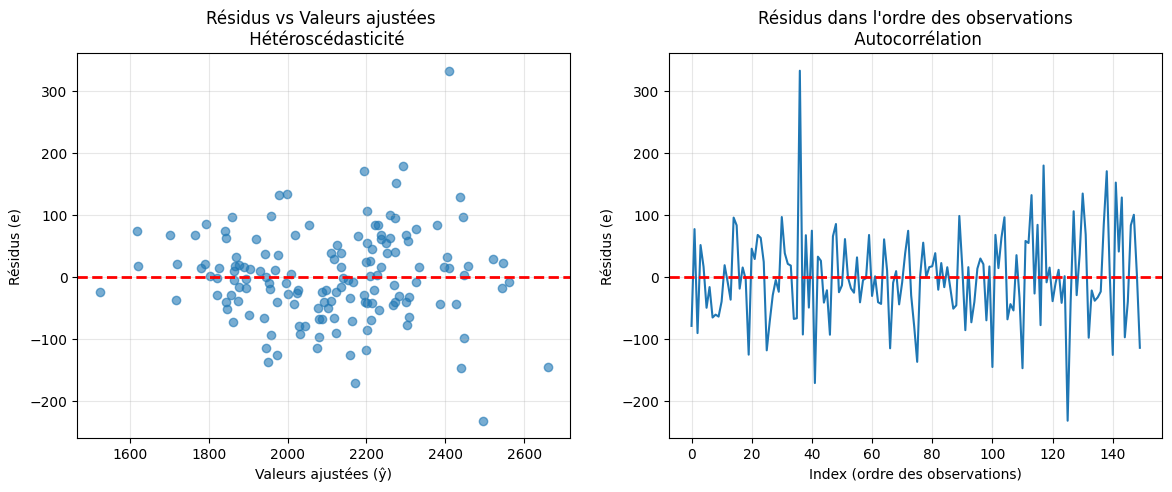

In [26]:
resid = model_origin.resid
fitted = model_origin.fittedvalues

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(fitted, resid, alpha = 0.6)
axes[0].axhline(y = 0, color = 'r', linestyle = '--', linewidth = 2 )
axes[0].set_xlabel("Valeurs ajustées (ŷ)")
axes[0].set_ylabel("Résidus (e)")
axes[0].set_title("Résidus vs Valeurs ajustées \n Hétéroscédasticité")
axes[0].grid(True, alpha=0.3)
             
axes[1].plot(resid.values if hasattr(resid, "values") else resid)
axes[1].axhline(y = 0, color = 'r', linestyle = '--', linewidth = 2 )
axes[1].set_xlabel("Index (ordre des observations)")
axes[1].set_ylabel("Résidus (e)")
axes[1].set_title("Résidus dans l'ordre des observations\n Autocorrélation")
axes[1].grid(True, alpha=0.3)

In [27]:
# test de Breusch–Pagan
U2 = U_hat**2
Z = X[:, 1:]   # on enlève la constante
alpha_hat = np.linalg.inv(Z.T @ Z) @ Z.T @ U2
U2_hat = Z @ alpha_hat
SSR_aux = np.sum((U2_hat - U2.mean())**2)
SST_aux = np.sum((U2 - U2.mean())**2)

R2_aux = SSR_aux / SST_aux
LM = len(U2) * R2_aux

p_value = 1 - chi2.cdf(LM, df=Z.shape[1])
print(f'p_value du test de Breusch - Pagan : {p_value:.4f}')

p_value du test de Breusch - Pagan : 0.0068


In [28]:
# correction matrice de White

S = X.T @ (X * U2[:, None])           # (k,k)

# 4) Variance-cov robust HC0
V_hc0 = XtX_inv @ S @ XtX_inv         # (k,k)

# 5) Robust SE + t-stats (si tu veux)
se_hc0 = np.sqrt(np.diag(V_hc0))      # (k,)
t_hc0 = (B_hat.reshape(-1) / se_hc0)

print("SE robustes (HC0):", se_hc0)
print("t-stats robustes (HC0):", t_hc0)

SE robustes (HC0): [1.13005651e+03 2.32914643e-01 6.45822335e+00 5.65269173e-01
 7.48013319e-01 3.40620874e+00 1.20933413e+01 6.76685581e-01
 3.60513423e+00 1.34240033e+01]
t-stats robustes (HC0): [-1.56888637 18.10770508  5.60574465  2.67230347 -9.81481285  2.59265446
  4.20734077  3.63677875  5.89747839  7.72317551]


In [29]:
# DW test
u = U_hat  # résidus (pas au carré)
dw_num = np.sum(np.diff(u)**2)
dw_den = np.sum(u**2)
DW = dw_num / dw_den

print(f"Durbin-Watson = {DW:.4f}")

Durbin-Watson = 2.1795


In [30]:
# écarts-types de Newey-West
N, k = X.shape

L = int(np.floor(4 * (N / 100) ** (2 / 9))) 
S_nw = np.zeros((k, k))

for t in range(N):
    xt = X[t].reshape(k, 1)
    S_nw += (U_hat[t] ** 2) * (xt @ xt.T)

for ell in range(1, L + 1):
    w = 1.0 - ell / (L + 1.0)  # poids de Bartlett
    Gamma = np.zeros((k, k))
    for t in range(ell, N):
        xt = X[t].reshape(k, 1)
        xlag = X[t - ell].reshape(k, 1)
        Gamma += (U_hat[t] * U_hat[t - ell]) * (xt @ xlag.T)
    S_nw += w * (Gamma + Gamma.T)

# 3) Variance-cov HAC et SE/t-stats
V_nw = XtX_inv @ S_nw @ XtX_inv
se_nw = np.sqrt(np.diag(V_nw))
t_nw = (B_hat.reshape(-1) / se_nw)

print(f'ecart type de Newey-West : {se_nw}')


ecart type de Newey-West : [9.68082636e+02 2.27703159e-01 7.19547842e+00 4.82088630e-01
 7.80600485e-01 3.46216983e+00 1.05138671e+01 6.96128097e-01
 4.32849251e+00 1.07911943e+01]


In [31]:
se_df = pd.DataFrame({
    "SE_MCO": model_origin.bse,
    "SE_White": se_hc0,
    "SE_Newey_West": se_nw
}).round(2)

print(se_df)


    SE_MCO  SE_White  SE_Newey_West
0  1083.75   1130.06         968.08
1     0.21      0.23           0.23
2     7.23      6.46           7.20
3     0.54      0.57           0.48
4     0.71      0.75           0.78
5     3.60      3.41           3.46
6    12.69     12.09          10.51
7     0.85      0.68           0.70
8     4.19      3.61           4.33
9    12.93     13.42          10.79


In [32]:
t_df = pd.DataFrame({
    "t_MCO": model_origin.tvalues,
    "t_White": t_hc0,
    "t_Newey_West": t_nw
}).round(2)

print(t_df)

   t_MCO  t_White  t_Newey_West
0  -1.64    -1.57         -1.83
1  20.37    18.11         18.52
2   5.01     5.61          5.03
3   2.79     2.67          3.13
4 -10.34    -9.81         -9.41
5   2.45     2.59          2.55
6   4.01     4.21          4.84
7   2.90     3.64          3.54
8   5.07     5.90          4.91
9   8.02     7.72          9.61


In [37]:
# Préparation des variables
y = df['Prix_milliers_euros']
X_endog = df['Qualite_ecole']
Z_inst = df['Distance_universite']

# Variables de contrôle (exogènes)
exog_cols = ['Surface_m2', 'Chambres', 'Annee_construction', 'Distance_centre_km', 
             'Etage', 'Ascenseur', 'Annee_vente', 'Revenu_median_quartier']
W = sm.add_constant(df[exog_cols])

# Validité de l'instrument (First Stage)
# On régresse la variable endogène sur l'instrument ET les contrôles
X_step1 = sm.add_constant(pd.concat([Z_inst, df[exog_cols]], axis=1))
model_step1 = sm.OLS(X_endog, X_step1).fit()

print("=== ÉTAPE 1 : RÉGRESSION DE L'INSTRUMENT (Validité) ===")
print(f"Coefficient de Distance_universite : {model_step1.params['Distance_universite']:.4f}")
print(f"P-valeur de l'instrument : {model_step1.pvalues['Distance_universite']:.4f}")
print(f"F-statistic de l'étape 1 : {model_step1.fvalue:.2f}")
print("-" * 50)

# On récupère les valeurs prédites "propres" (X_hat)
df['Qualite_ecole_hat'] = model_step1.predict(X_step1)

# Calcul matriciel (Second Stage)
# Formule du cours : Beta = (X_hat' * X_hat)^-1 * X_hat' * y
# On construit la matrice X finale avec la variable instrumentée
X_final = sm.add_constant(pd.concat([df['Qualite_ecole_hat'], df[exog_cols]], axis=1))

# Conversion en matrices numpy pour l'algèbre
X_mat = X_final.values
y_mat = y.values

# Calcul : (X'X)^-1 * X'y
beta_iv = np.linalg.inv(X_mat.T @ X_mat) @ (X_mat.T @ y_mat)

# --- AFFICHAGE DES RÉSULTATS ---
labels = ['Constante', 'Qualite_ecole (IV)'] + exog_cols
results_manual = pd.Series(beta_iv, index=labels)

print("=== ÉTAPE 2 : COEFFICIENTS IV CALCULÉS ===")
print(results_manual)

=== ÉTAPE 1 : RÉGRESSION DE L'INSTRUMENT (Validité) ===
Coefficient de Distance_universite : -0.1447
P-valeur de l'instrument : 0.0000
F-statistic de l'étape 1 : 12.32
--------------------------------------------------
=== ÉTAPE 2 : COEFFICIENTS IV CALCULÉS ===
Constante                -45664.933010
Qualite_ecole (IV)            2.093095
Surface_m2                    4.292819
Chambres                     33.229231
Annee_construction            1.625046
Distance_centre_km           -7.167897
Etage                         8.029486
Ascenseur                    55.583787
Annee_vente                  21.620536
Revenu_median_quartier        4.921996
dtype: float64
